In [18]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается, что текущая цена акции, равная 100 руб., не изменится более чем на 10%. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная
ставка – 7%. Постройте структурный продукт с полной защитой капитала и использованием опционной стратегии бинарный диапазон (binary range).

In [26]:
# оценка стоимости бинарного опциона колл
def binary_option_call(t, S, K, T, r, q, sigma):

    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
        return np.exp(-r*T)*norm.cdf(d2)
    if t == 'asset-or-nothing':
        return S*np.exp(-q*T)*norm.cdf(d1)

# оценка стоимости бинарного опциона пут
def binary_option_put(t, S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
        return np.exp(-r*T)*norm.cdf(-d2)
    if t == 'asset-or-nothing':
        return S*np.exp(-q*T)*norm.cdf(-d1)

In [146]:
S = 100
K = 100
T = 1
r = 0.07
q = 0
N = 100000
sigma = 0.3

In [147]:
C1=90
b90 = binary_option_call('cash-or-nothing', S, C1, T, r, q, sigma)
C2=110
b110 = binary_option_call('cash-or-nothing', S, C2, T, r, q, sigma)
print('digital range = ', b90-b110)

digital range =  0.24307515482345715


In [29]:
risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(b90-b110))
print('количество опционных стратегий', Q)

количество опционных стратегий 27813


In [30]:
print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

максимальная доходность, годовых =  0.27813
максимальная доходность, непрерывно =  0.2453980722218178


В условиях примера 1.

1. Повторите все расчеты с использованием бинарной стратегии, основанной на покупке и продаже европейского опциона put. Ширину диапазона доходности базового актива задать самостоятельно. Выбор обосновать.

2. Постройте график функции выплат для бинарных стратегий, основанных

а) на покупке и продаже опционов колл,
б) на покупке и продаже опционов пут.

3. Постройте графики аналогичные ЛБ 1.



In [81]:
# Task 1
# motivation? ok, we assume the asset is going up so
# we suppose buy binary put option with barrier 120 and sell one with 100 that is less probable
P1=100
b100 = binary_option_put('cash-or-nothing', S, P1, T, r, q, sigma)
P2=125
b120 = binary_option_put('cash-or-nothing', S, P2, T, r, q, sigma)
print('digital range = ', b120-b100)

risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(b120-b100))
print('количество опционных стратегий', Q)

print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

digital range =  0.25988925076880165
количество опционных стратегий 26013
максимальная доходность, годовых =  0.26013
максимальная доходность, непрерывно =  0.2312148902444279


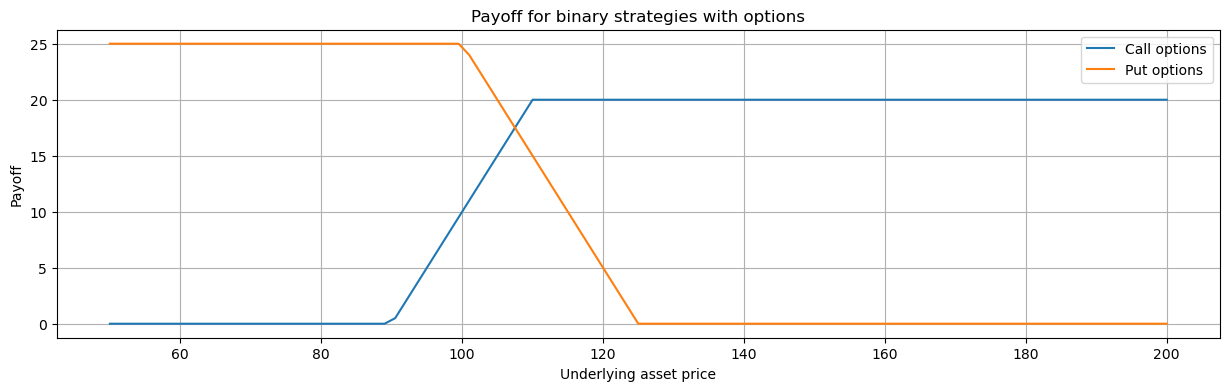

In [83]:
# task 2 plot
Sm = np.linspace(0.5*S, 2*S, 101)

C1_payoffs = np.maximum(0, (Sm - C1))
C2_payoffs = np.maximum(0, (Sm - C2))

P1_payoffs = np.maximum(0, (-Sm + P1))
P2_payoffs = np.maximum(0, (-Sm + P2))

plt.figure(figsize=(15,4))
plt.title('Payoff for binary strategies with options')
plt.plot(S_line, C1_payoffs - C2_payoffs, label=f'Call options')
plt.plot(S_line, -P1_payoffs + P2_payoffs, label=f'Put options')

plt.xlabel('Underlying asset price')
plt.ylabel('Payoff')
plt.grid(); plt.legend()
plt.show()

Пример 2. Рассмотрим гэп опционы колл и пут на недивидендные акции со страйком 57 и сроком действия, истекающим 1 июля 2024 г. 1 января 2024 г. акции торгуются по цене 50. Используя эти данные, вычислите цену опциона колл и пут, если безрисковая ставка равна 9%, цена страйк 50, волатильность 20%.



In [86]:
# оценка стоимости гэп опциона
def gap_option_price(S, K1, K2, T, r, q, sigma):
    d1 = (np.log(S/K2) + (r - q + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    c = S  * np.exp(-q * T) * norm.cdf(d1) - K1 * np.exp(-r * T) * norm.cdf(d2)
    p = K1 * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return c, p

In [90]:
S=50
K1=57
K2=60
T=1/2
r=0.09
q=0
sigma = 0.2

gap_option_price(S, K1, K2, T, r, q, sigma)

(1.0922383616331572, 5.584094826119852)

В условиях примера 2.

1. Простройте график выплат для опциона гэп колл

2. Простройте график выплат для опциона гэп пут

In [93]:
# task 2 plot

def plot_payoff_gap_option_call(S, K1, K2):
    S_line = np.linspace(0.5*S, 2*S, 101)
    Sm = np.linspace(0.5*S, 2*S, 101)
    Sm[Sm < K2] = 0
    C_payoffs = np.maximum(0, (Sm - K1))

    plt.figure(figsize=(15,4))
    plt.title('Payoff for gap options')
    plt.plot(S_line, C_payoffs, label=f'Gap Call option')
    plt.xlabel('Underlying asset price')
    plt.ylabel('Payoff')
    plt.grid(); plt.legend()
    plt.show()
    
def plot_payoff_gap_option_put(S, K1, K2):
    S_line = np.linspace(0.5*S, 2*S, 101)
    Sm = np.linspace(0.5*S, 2*S, 101)
    P_payoffs = np.maximum(0, K1 - Sm)
    P_payoffs[P_payoffs>0] += (K2-K1)

    plt.figure(figsize=(15,4))
    plt.title('Payoff for gap options')
    plt.plot(S_line, P_payoffs, label=f'Gap Put option')

    plt.xlabel('Underlying asset price')
    plt.ylabel('Payoff')
    plt.grid(); plt.legend()
    plt.show()

В рамках модели Блэка-Шоулза решите следующие задачи для бинарных опционов.

Задача 1. Маркет-мейкер продает европейские гэп-колл опционы сумму 1000 сроком на один год и дельта-хеджирует позицию акциями.
Опцион гэп-колл выписан на одну акцию, не приносящую дивидендов. Текущая цена акции составляет 100.
Волатильность акции составляет 100\%. Каждый колл-гэп опцион  имеет цену исполнения 130, триггер цена равна  100. Безрисковая процентная ставка равна 0\%. В рамках модели Блэка-Шоулза определите начальное количество акций для  дельта-хеджирования. Указание. Определите дельту опциона и умножьте на 1000. Ответ: 586.


Задача 2. Безрисковая процентная ставка составляет 6%, волатильность бездивидендных акций составляет 32%. Четырехлетний опцион пут «деньги или ничего» на эту акцию с триггерной ценой 135 имеет премию 0,32494. Найдите цену 4-летнего опциона колл «актив или ничего» на эту акцию с триггерной ценой 135.

Задача 3. Волатильность базового актива 25%, волатильность годового опциона колл со страйком 50 на акции составляет 120,68%. Маркет-мейкер выписывает один опцион колл и дельта хеджирует свою позицию. Стоимость акции в хеджирующем портфеле равна 34,74. Найдите цену годового опциона «деньги или ничего» колл на акцию с триггерной ценой 50.

Задача 4. Акции по цене 75 выплачивают дивиденды по ставке 2% (непрырывное начисление), волатильность акций 40%. Коэффициент Шарпа для акции равен 0. Шестимесячный опцион «актив или ничего» колл на акцию с триггером 80 стоит 36,65. Рассчитайте вероятность того, что опцион колл «актив или ничего» будет исполнен.


In [ ]:
def calc_derivative(func, x, dx=1e-2):
    return (func(x + dx) - func(x - dx)) / 2 / dx

In [134]:
# task 1
n_options = 1000
S0 = 100
vol = 1.
K1 = 130
K2 = 100
r = 0.0
q = 0
T = 1

dC_ds = lambda S: calc_derivative(lambda s: gap_option_price(s, K1, K2, T, r, q, vol)[0], x=S)
init_qty = dC_ds(S0) * n_options
print(round(init_qty, 2))

585.84


In [ ]:
# task 2
r = 0.06
vol = 0.32
T = 4
K = 135
put_premium = 0.32494
S0 = 100

# use put-call options paritet
# assume K == S
call_premium = K * (np.exp(-q*T) - np.exp(-r*T)) + put_premium
print(round(call_premium, 2))

29.13


In [142]:
# task 3
ba_vol = 0.25
T = 1
K = 50
opt_vol = 120.68 / 100
S0 = 34.74
q = 0
r = 0

binarniy_option = binary_option_call('cash-or-nothing', S0, K, T, r, q, ba_vol)
print(round(binarniy_option, 4))

0.0569


In [152]:
# task 4
S0 = 75
q = 0.02
vol = 0.4
sharpe = 0 # => r = 0
r = 0
T = 0.5
K = 80
call_px = 36.65

# call px = |asset or nothing| = S*np.exp(-q*T)*norm.cdf(d1)
# prob => norm.cdf(d1) = call_px * np.exp(q*T) / S

cdf_exec = call_px / S0 * np.exp(q*T)
print('Prob =', round(cdf_exec,2))

Prob = 0.49
